Ejercicios estadística descriptiva
En este caso usaremos el mismo DataFrame que hemos estado usando en los últimos ejercicios. El ejercicio que os planteamos es:

Eres analista de datos en una organización internacional y quieres entender mejor la situación de los países a través de varios indicadores numéricos: población, esperanza de vida, fertilidad, PIB, emisiones, etc.

1. Resumen básico de indicadores clave
Trabajaremos con estas variables numéricas:

population

density

life_expectancy

fertility_rate

gdp

Calcula, para cada una de estas variables:

Media

Mediana

Desviación estándar

Mínimo

Máximo

Interpreta:

Elige dos variables y comenta si la media y la mediana están próximas o muy separadas.

¿Qué te sugiere esto sobre la posible presencia de valores extremos (outliers)?

2. Distribución y forma: esperanza de vida vs. fertilidad
Variables:

life_expectancy

fertility_rate

Para cada variable:

Muestra un histograma.

Calcula la media y la mediana.

Interpreta:

¿La distribución parece aproximadamente simétrica, sesgada a la derecha o a la izquierda?

¿En cuál de las dos variables la media se ve más afectada por posibles valores extremos?

¿En cuál te parece más “robusto” el uso de la mediana?

3. Población total vs. densidad de población
Variables:

population

density

Calcula para ambas:

Media, mediana, desviación estándar.

Dibuja un histograma de population y otro de density (puedes usar escala logarítmica en el eje X si lo ves necesario).

Interpreta:

¿Cuál de las dos variables parece más concentrada (menos dispersa)?

¿Por qué no es lo mismo analizar population que density cuando comparamos países?

4. Relación entre fertilidad y esperanza de vida (correlación numérica)
Variables:

fertility_rate

life_expectancy

Calcula el coeficiente de correlación de Pearson entre fertility_rate y life_expectancy.

Crea un diagrama de dispersión (scatter plot) con:

Eje X: fertility_rate

Eje Y: life_expectancy

Interpreta:

¿La correlación es positiva o negativa? ¿Es fuerte, moderada o débil?

Describe, en lenguaje de negocio, qué significa esta relación:

“En general, los países con X tienden a tener Y…”.

5. PIB, emisiones y población: ¿qué se relaciona con qué?
Variables:

gdp

co2-emissions

population

Calcula una matriz de correlación solo con estas tres variables.

(Opcional) Representa la matriz en un heatmap.

Interpreta:

¿Qué par de variables tiene la correlación más alta?

¿Tiene sentido desde el punto de vista económico/medioambiental?

¿Hay algún par con correlación muy baja (cerca de 0)? ¿Qué interpretación darías?

6. Comparando grupos con medias y medianas: países más y menos ricos
Variable base:

gdp

Calcula la mediana de gdp en el conjunto de datos.

Crea dos grupos de países:

grupo_bajo_gdp: países con gdp por debajo (o igual) de la mediana.

grupo_alto_gdp: países con gdp por encima de la mediana.

Para cada grupo, calcula la media y la mediana de:

life_expectancy

infant_mortality

Interpreta:

¿En qué grupo la esperanza de vida es mayor, de media?

¿En qué grupo la mortalidad infantil es más alta?

En lenguaje de políticas públicas, ¿qué conclusión preliminar podrías sacar de esta comparación simple?

7. Bonus: variabilidad de la fuerza laboral
Variable:

population_labor_force_participation

Calcula:

Media

Mediana

Desviación estándar

Percentiles 25, 50 y 75.

Interpreta:

¿Está la participación en la fuerza laboral muy concentrada alrededor de un valor, o es bastante dispersa?

¿Qué te indica la comparación entre los percentiles 25 y 75 sobre las diferencias entre países?

En todos los ejercicios, no te quedes solo en el “número”: añade siempre una breve interpretación en lenguaje natural, como lo haría un analista al presentar resultados a un equipo no técnico.

Previous
Ejercicios
Next

1. Resumen básico de indicadores clave
Trabajaremos con estas variables numéricas:

population

density

life_expectancy

fertility_rate

gdp

Calcula, para cada una de estas variables:

Media

Mediana

Desviación estándar

Mínimo

Máximo

Interpreta:

Elige dos variables y comenta si la media y la mediana están próximas o muy separadas.

¿Qué te sugiere esto sobre la posible presencia de valores extremos (outliers)?

In [10]:
import pandas as pd
import numpy as np

# Imputación de nulos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)

In [11]:
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col = 0)
df.head(1)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.23,323.0,32.49,93.0,Kabul,8.672,149.9,2.3,AFN,4.47,2.1,0.7,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.93911,67.709953,Asia


In [12]:

cols = ['population', 'density', 'life_expectancy', 'fertility_rate', 'gdp']
for col in cols:
    print(f"\n--- Estadísticas de {col} ---")
    print(f"Media: {df[col].mean()}")
    print(f"Mediana: {df[col].median()}")
    print(f"Desviación estándar: {df[col].std()}")
    print(f"Mínimo: {df[col].min()}")
    print(f"Máximo: {df[col].max()}")


--- Estadísticas de population ---
Media: 333.54271794871795
Mediana: 215.056
Desviación estándar: 296.4675039945089
Mínimo: 10.084
Máximo: 973.56

--- Estadísticas de density ---
Media: 134.50453333333334
Mediana: 83.0
Desviación estándar: 157.30677429990715
Mínimo: 1.265
Máximo: 847.0

--- Estadísticas de life_expectancy ---
Media: 72.27967914438503
Mediana: 73.2
Desviación estándar: 7.483660617677969
Mínimo: 52.8
Máximo: 85.4

--- Estadísticas de fertility_rate ---
Media: 2.6981382978723403
Mediana: 2.245
Desviación estándar: 1.28226747775756
Mínimo: 0.98
Máximo: 6.91

--- Estadísticas de gdp ---
Media: 477295901399.5389
Mediana: 34387229486.0
Desviación estándar: 2172173359474.0532
Mínimo: 47271463.0
Máximo: 21427700000000.0


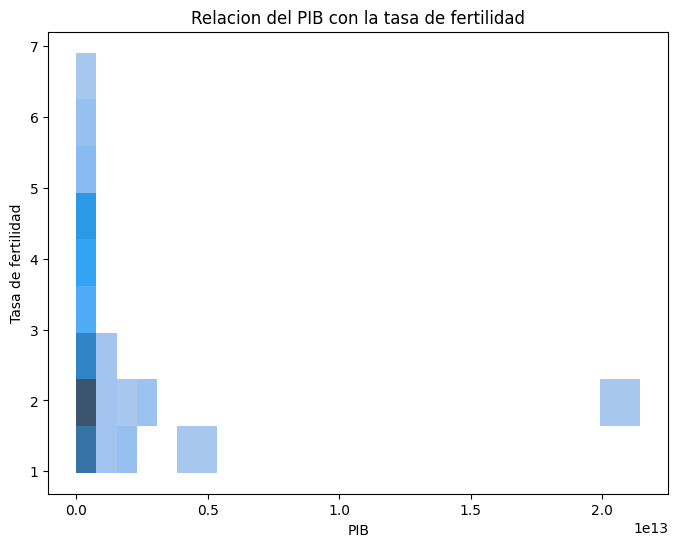

In [17]:

plt.figure(figsize=(8, 6))

sns.histplot(
    data=df,
    x='gdp',
    y='fertility_rate'
)

plt.xlabel('PIB')
plt.ylabel('Tasa de fertilidad')
plt.title('Relacion del PIB con la tasa de fertilidad')

plt.show()